# Predicting NBA Player Career Duration and Twitter Sentiment

In [1]:
%load_ext lab_black
import warnings
import sys

sys.path.append("..")
from src.main import analyze_nba_career_duration_model, analyze_twitter_sentiment_model

warnings.filterwarnings("ignore")

Run model pipeline fit and plot learning curves for all 5 models

Analyzing Decision Tree completed in 87.3438 seconds


/Users/chen_bowen/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/chen_bowen/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/chen_bowen/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/chen_bowen/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/chen_bowe

Analyzing Neural Network completed in 1066.6842 seconds
Analyzing AdaBoost completed in 324.6125 seconds
Analyzing SVC completed in 290.5625 seconds
Analyzing KNN completed in 911.7708 seconds


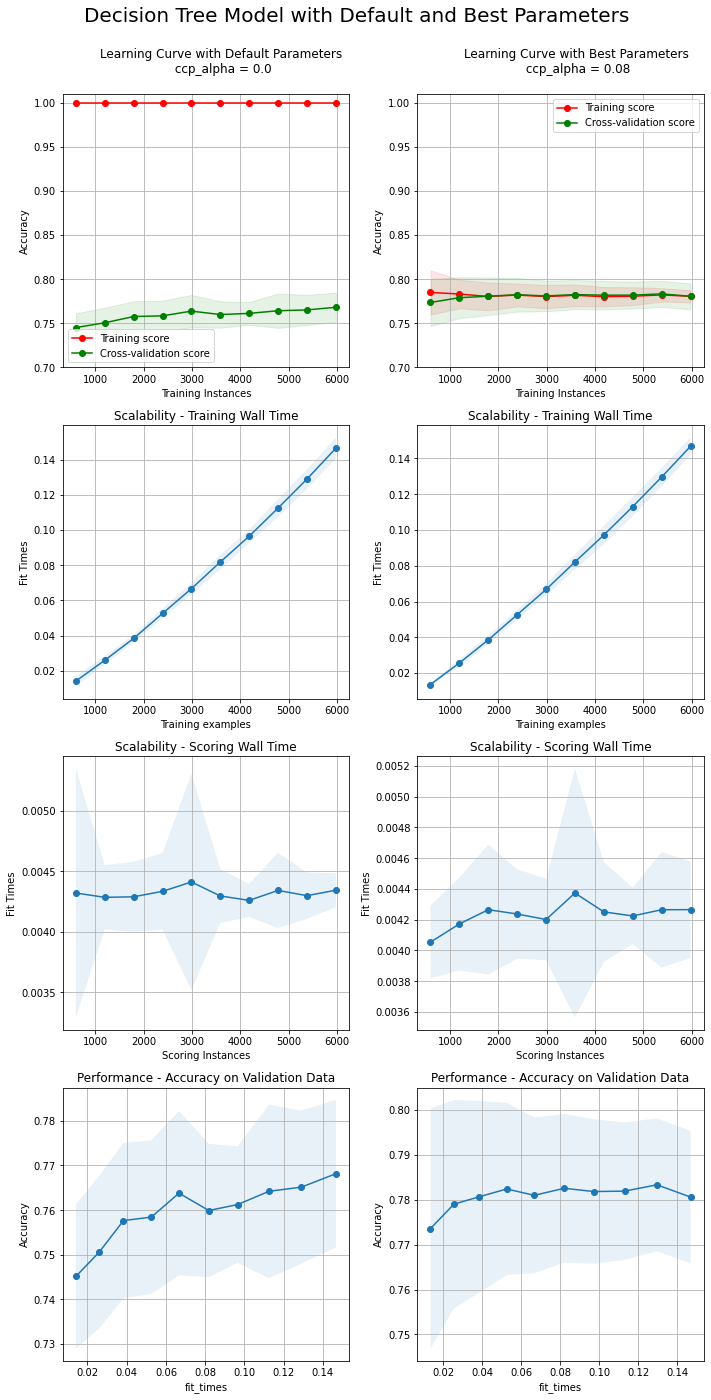

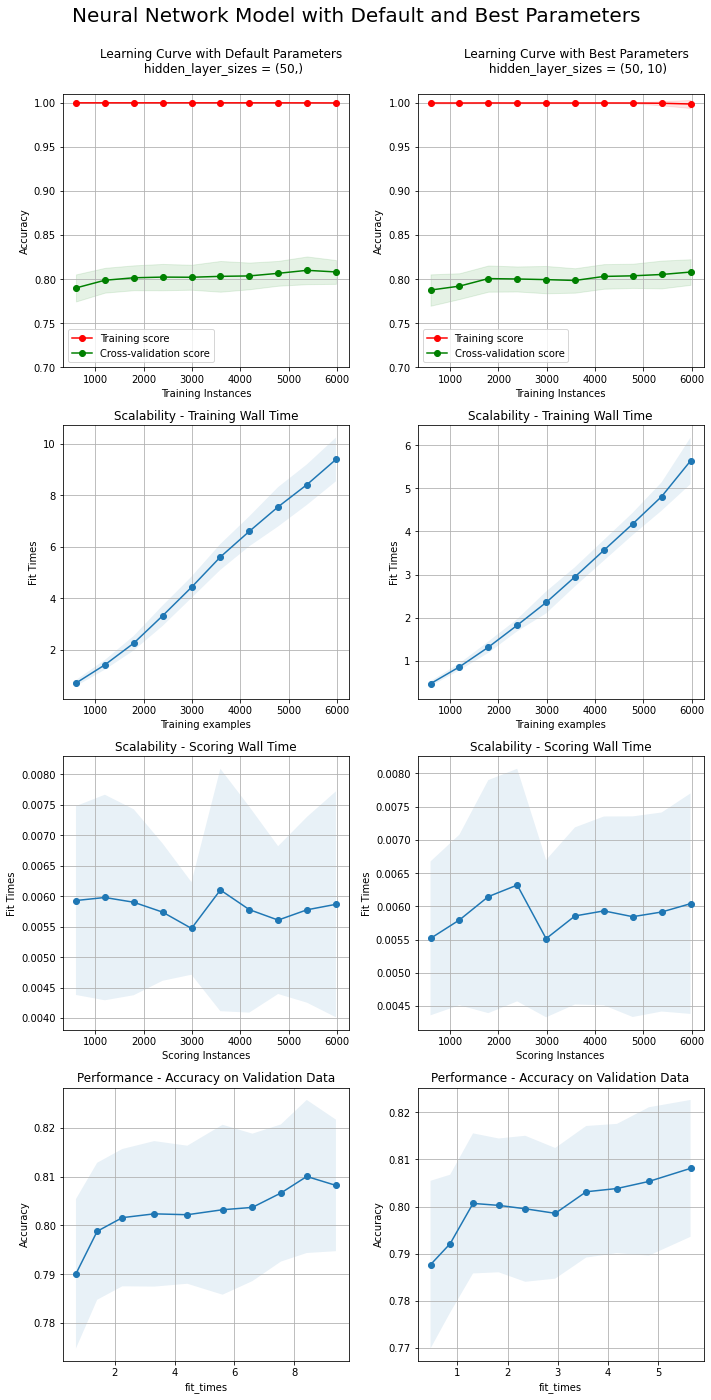

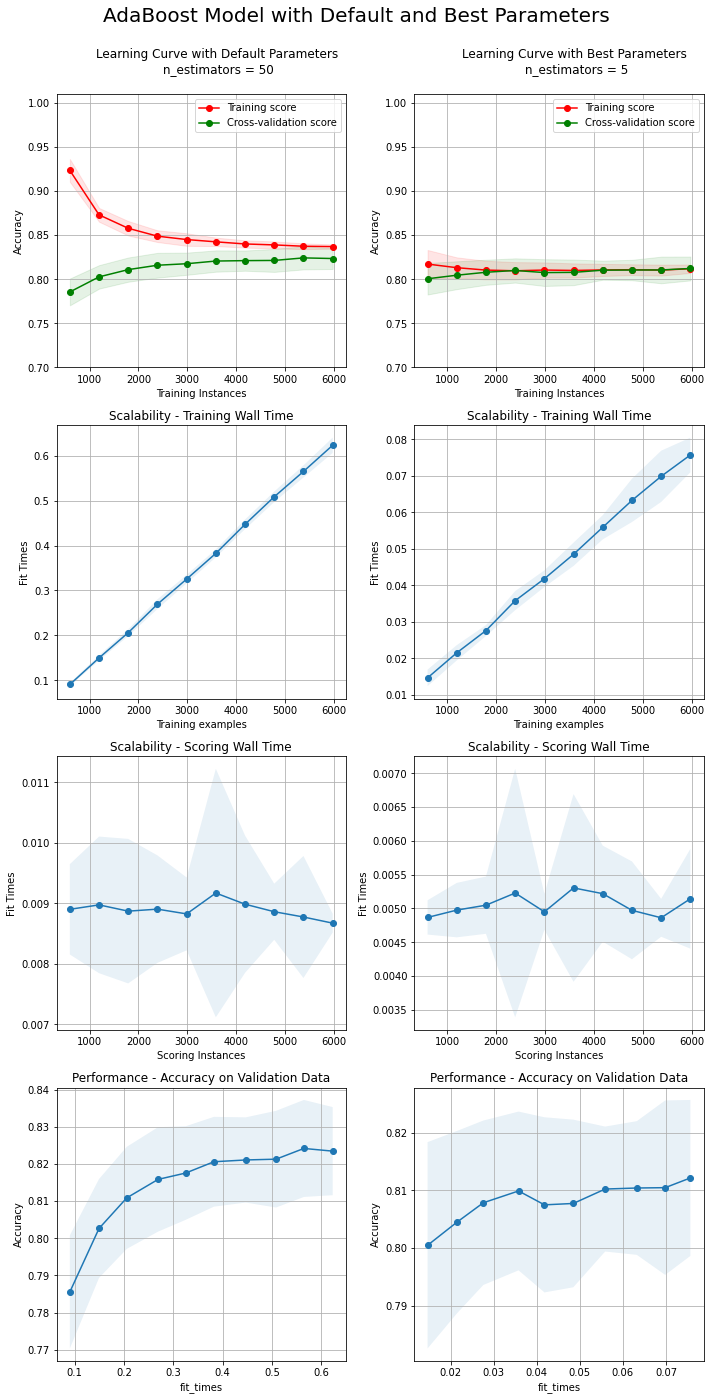

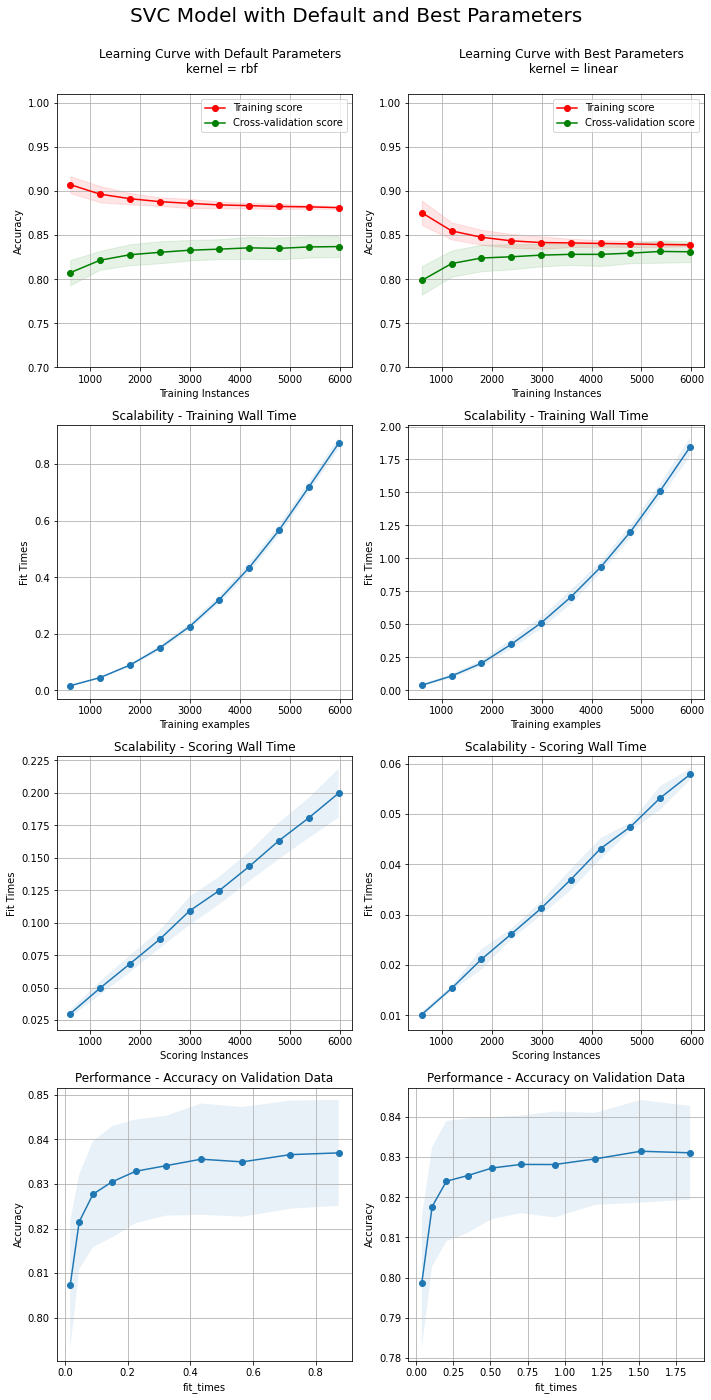

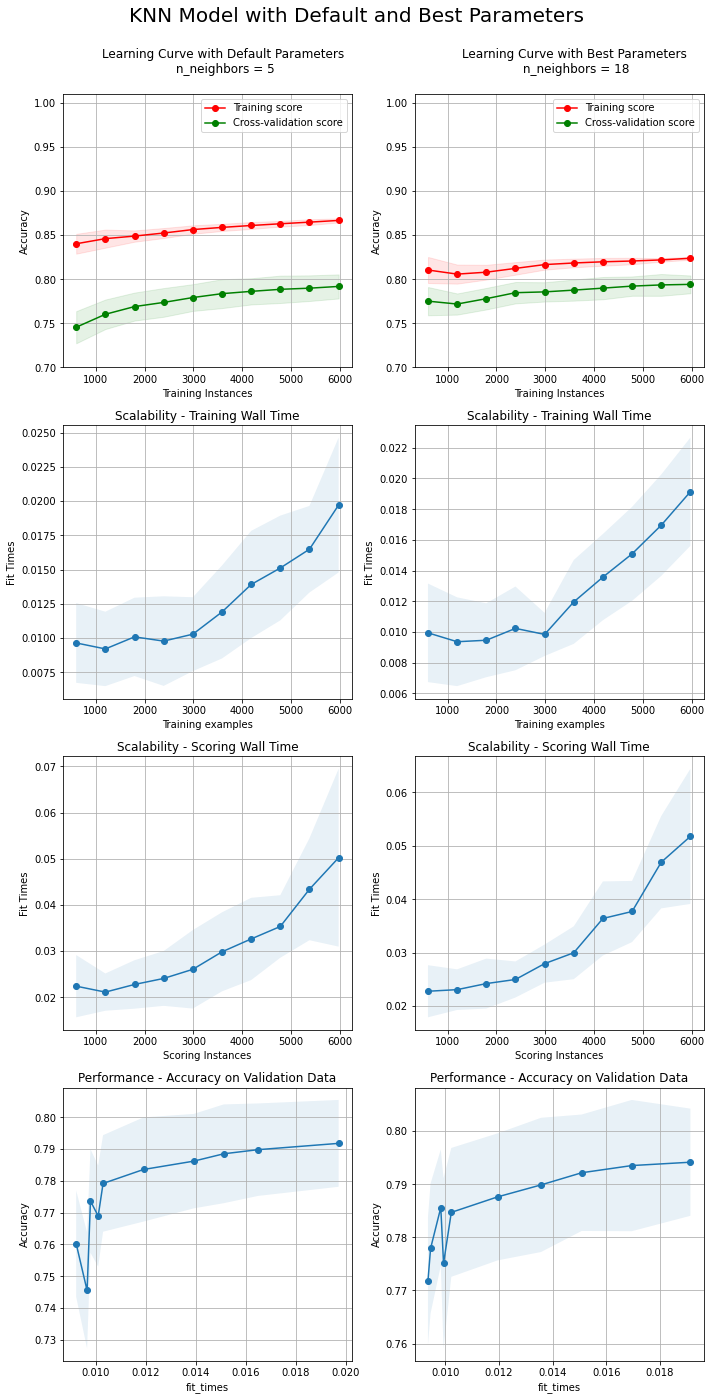

In [2]:
analyze_nba_career_duration_model()